In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Image Classification with ANN Using Fashion MNIST Dataset**

**Project Type**: EDA and ANN

***Objective***

To build an Artificial Neural Network that classifies images of clothing items (like t-shirts, trousers, and shoes) into predefined categories.

**Dataset Info:**

The Fashion MNIST dataset is a set of 28x28 grayscale images of 10 fashion categories:

*   T-shirt/top
*   Trouser
*   Pullover
*   Dress
*   Coat
*   Sandal
*   Shirt
*   Sneaker
*   Bag
*   Ankle boot








**Imorting libraries**


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix


**Load and Preprocess the Data**

In [5]:
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist_dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Normalize the pixel values to be between 0 and 1**

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Exploratory Data Analysis (EDA)**

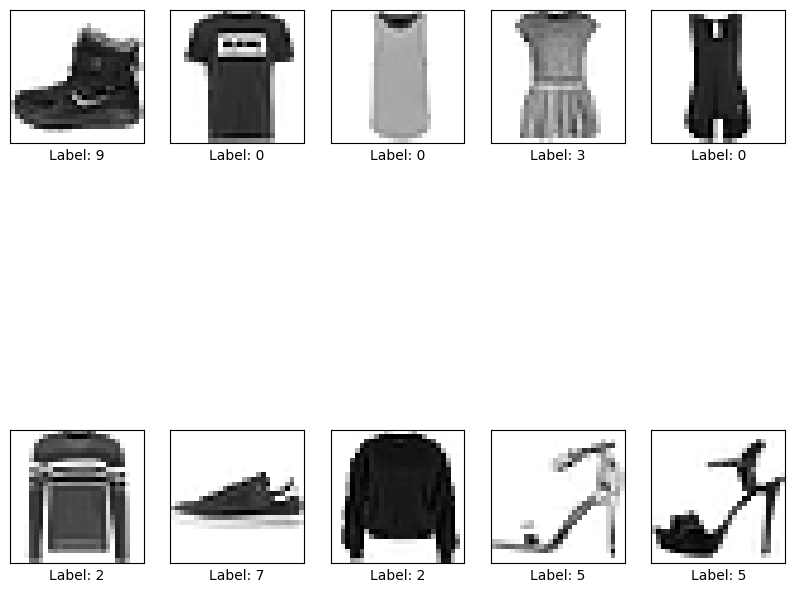

In [7]:
# Plot the first 10 images in the training dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')
plt.show()

Each image corresponds to a clothing category with a label (0–9), which we will map as follows:

*   0 = T-shirt/top
*   1 = Trouser
*   2 = Pullover
*   3 = Dress
*   4 = Coat
*   5 = Sandal
*   6 = Shirt
*   7 = Sneaker
*   8 = Bag
*   9 = Ankle boot








**Distribution of Classes**

In [8]:
# Distribution of the labels in the training dataset
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution: ", class_distribution)


Class Distribution:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


**Build the Artificial Neural Network (ANN)**

In [9]:
# Initialize the model
model = Sequential()

# Flatten the 28x28 images into a 1D array (28*28 = 784)
model.add(Flatten(input_shape=(28, 28)))

# Add hidden layers with ReLU activation
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Output layer with 10 units for the 10 classes, using softmax activation
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10,
                    batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7638 - loss: 0.6819 - val_accuracy: 0.8601 - val_loss: 0.3887
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8583 - loss: 0.3886 - val_accuracy: 0.8586 - val_loss: 0.3883
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8731 - loss: 0.3452 - val_accuracy: 0.8634 - val_loss: 0.3802
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8805 - loss: 0.3209 - val_accuracy: 0.8674 - val_loss: 0.3590
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8893 - loss: 0.2979 - val_accuracy: 0.8802 - val_loss: 0.3313
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8964 - loss: 0.2809 - val_accuracy: 0.8731 - val_loss: 0.3544
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9036 - loss: 0.2597 - val_accuracy: 0.8863 - val_loss: 0.3227
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9021 - loss: 0.2565

**Evaluate the Model**

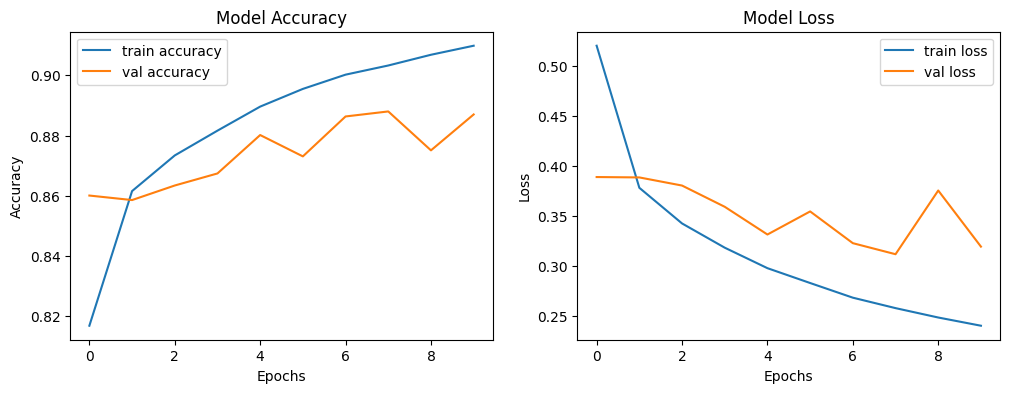

In [11]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Performance on Test Data**

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.3402
Test Accuracy: 87.88%


**Confusion Matrix and Classification Report**

In [13]:
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification report
print(classification_report(y_test, y_pred, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[867   0  15  22   4   1  85   0   6   0]
 [  6 969   1  20   2   0   1   0   1   0]
 [ 22   1 786  22 106   0  62   0   1   0]
 [ 29   3   8 914  23   0  20   0   3   0]
 [  1   1  96  44 815   0  42   0   1   0]
 [  0   0   0   0   0 967   0  11   1  21]
 [157   0  88  34  70   0 645   0   6   0]
 [  0   0   0   0   0  36   0 874   0  90]
 [  7   0   2   3   5   4  10   3 966   0]
 [  0   0   0   0   0   4   1  10   0 985]]
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.79      0.79      1000
       Dress       0.86      0.91      0.89      1000
        Coat       0.80      0.81      0.80      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.74      0.65      0.69      1000
     Sneaker       0.97      0.87      0.92      1000
         Bag       0.98      0.97      0.